# Ground Truth from Stand-Up Comedy Transcripts

### 1. Seperate the transcript into individual sentences and map the timestamps of the audio with the sentences

Forced Alignment was done via the aid of Aeneas

### 2. Use Laughter Detection Tool to find the laughter in the given audio

Laughter Detection is Done via

https://colab.research.google.com/drive/1ixYPfET1HXgxr2K1SjgYY11-BKu7u_UZ?usp=sharing&pli=1&authuser=2#scrollTo=R3LqFPm9biYP

https://colab.research.google.com/drive/1ixYPfET1HXgxr2K1SjgYY11-BKu7u_UZ#scrollTo=R3LqFPm9biYP

In [73]:
!pip install praatio

In [74]:
def read_textgrid_file(file_path):
    intervals = {}
    with open(file_path, 'r') as file:
        lines = file.readlines()

        start_time = None
        for line in lines:
            if line.strip() == '""':
                if start_time is not None and start_time != 0.0:
                    end_time = float(previous_line.strip())
                    intervals[start_time] = end_time
                start_time = None
            elif line.strip().replace('.', '', 1).isdigit():
                if start_time is None:
                    start_time = float(line.strip())
            previous_line = line

    return intervals

In [75]:
textgrid_file_path = "/content/DG_W_audio_11_laughter.TextGrid"
dg_intervals = read_textgrid_file(textgrid_file_path)

for start, end in dg_intervals.items():
    print("start:", start, "end:", end)

start: 14.268125337655322 end: 33.29229245452908
start: 33.29229245452908 end: 37.7906176841347
start: 37.7906176841347 end: 68.88060507833603
start: 68.88060507833603 end: 85.49160813974429
start: 85.49160813974429 end: 93.05910318746623
start: 93.05910318746623 end: 107.8426616243472
start: 107.8426616243472 end: 115.01186745903115


In [76]:
print(dg_intervals)

{14.268125337655322: 33.29229245452908, 33.29229245452908: 37.7906176841347, 37.7906176841347: 68.88060507833603, 68.88060507833603: 85.49160813974429, 85.49160813974429: 93.05910318746623, 93.05910318746623: 107.8426616243472, 107.8426616243472: 115.01186745903115}


### 3. Match the funny sentences with the laughter

In [77]:
import json

In [78]:
dg_laugh_times = [{'filename': 'dg_laughter/laugh_0.wav', 'start': 14.268125337655322, 'end': 19.352169998199173},
                  {'filename': 'dg_laughter/laugh_1.wav', 'start': 33.29229245452908, 'end': 34.18258598955519},
                  {'filename': 'dg_laughter/laugh_2.wav', 'start': 37.7906176841347, 'end': 53.44104087880425},
                  {'filename': 'dg_laughter/laugh_3.wav', 'start': 68.88060507833603, 'end': 73.82407707545471},
                  {'filename': 'dg_laughter/laugh_4.wav', 'start': 85.49160813974429, 'end': 88.60763551233568},
                  {'filename': 'dg_laughter/laugh_5.wav', 'start': 93.05910318746623, 'end': 93.8322528363047},
                  {'filename': 'dg_laughter/laugh_6.wav', 'start': 107.8426616243472, 'end': 110.95868899693859},
                  {'filename': 'dg_laughter/laugh_7.wav', 'start': 115.01186745903115, 'end': 116.18330632090762}]

In [79]:
import json
with open('dg_output.json', 'r') as file:
    transcript_data = json.load(file)

In [80]:
def create_laughter_map(laugh_times, transcript_data_path):
    with open(transcript_data_path, 'r') as file:
        transcript_data = json.load(file)

    laughter_map = {}
    for laugh_start, laugh_end in laugh_times.items():
        funny_sent = []
        for fragment in transcript_data["fragments"]:
            start_frag = float(fragment['begin'])
            end_frag = float(fragment['end'])
            if end_frag < laugh_start:
                sentence = " ".join(fragment['lines']).strip()
                funny_sent.append(sentence)
                if len(funny_sent) > 2:
                    funny_sent.pop(0)
        funny_sent_comb = " ".join(funny_sent)
        laughter_map[laugh_start] = funny_sent_comb

    return laughter_map

In [82]:
def create_laughter_map(laugh_times, transcript_data_path):
    with open(transcript_data_path, 'r') as file:
        transcript_data = json.load(file)

    laughter_map = {}
    used_sentences = set()

    for laugh_start, laugh_end in laugh_times.items():
        funny_sent = []
        for fragment in transcript_data["fragments"]:
            start_frag = float(fragment['begin'])
            end_frag = float(fragment['end'])
            if end_frag < laugh_start:
                sentences = " ".join(fragment['lines']).strip()
                if sentences and sentences not in used_sentences:
                    funny_sent.append(sentences)
                    used_sentences.add(sentences)
                if len(funny_sent) > 2:
                    funny_sent.pop(0)
        funny_sent_comb = " ".join(funny_sent)
        if funny_sent_comb:
            laughter_map[laugh_start] = funny_sent_comb

    return laughter_map

In [84]:
dg_laughter_map = create_laughter_map(dg_intervals, "/content/dg_output.json")

for laugh_start, matching_sentences in dg_laughter_map.items():
    print("Laughter Start Time:", laugh_start)
    print("Funny Sentences:", matching_sentences)
    print()

Laughter Start Time: 14.268125337655322
Funny Sentences: I was babysitting this kid once, this mean kid, and I remember the first time I saw him, I opened the door and there were tears streaming down his face, tears streaming down his face, but he wasn't crying. He wasn't crying.

Laughter Start Time: 33.29229245452908
Funny Sentences: The sweetest thing he was allowed was mints. He was just allowed to have mints.

Laughter Start Time: 37.7906176841347
Funny Sentences: So he would steal mints by the handful.

Laughter Start Time: 68.88060507833603
Funny Sentences: And I would take him to the park and I was the only boy there, you know, I was hanging out. You know, they were cool.

Laughter Start Time: 85.49160813974429
Funny Sentences: You know, we'd trade jerk- chicken recipes and stuff.

Laughter Start Time: 93.05910318746623
Funny Sentences: And he... he was just a mean-spirited kid, like, he kind Of... Like, he watched HBO just a little too early and was just kind of a mean kid in 

In [85]:
dg_funny_sentences = []
for value in dg_laughter_map.values():
  dg_funny_sentences.append(value)

for sentences in dg_funny_sentences:
  print(sentences, "\n")

I was babysitting this kid once, this mean kid, and I remember the first time I saw him, I opened the door and there were tears streaming down his face, tears streaming down his face, but he wasn't crying. He wasn't crying. 

The sweetest thing he was allowed was mints. He was just allowed to have mints. 

So he would steal mints by the handful. 

And I would take him to the park and I was the only boy there, you know, I was hanging out. You know, they were cool. 

You know, we'd trade jerk- chicken recipes and stuff. 

And he... he was just a mean-spirited kid, like, he kind Of... Like, he watched HBO just a little too early and was just kind of a mean kid in general, so he would just come through and just...He wanted to get to his slide, so he just pushed over this little girl, she fell over, and her Trinidadian babysitter comes over and goes, "Hey! 

And he goes, "Shut up." And she goes, "Don't you talk to me like that, I am a grown-up, you will respect me." 



In [86]:
def make_sent_list(laughter_map):
  sentences = []
  for value in laughter_map.values():
    sentences.append(value)
  return sentences

### 3. Amplitude graph

In [87]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [88]:
def plot_mp3(audio, name):
  data, sr = librosa.load(audio, sr=None)

  time = np.arange(len(data)) / sr
  plt.figure(figsize=(14, 5))
  plt.plot(time, data, color="pink")
  plt.title(f"Waveform of {name} Transcript")
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.show()

In [89]:
dg_audio = "/content/DG_W_audio_11.mp3"

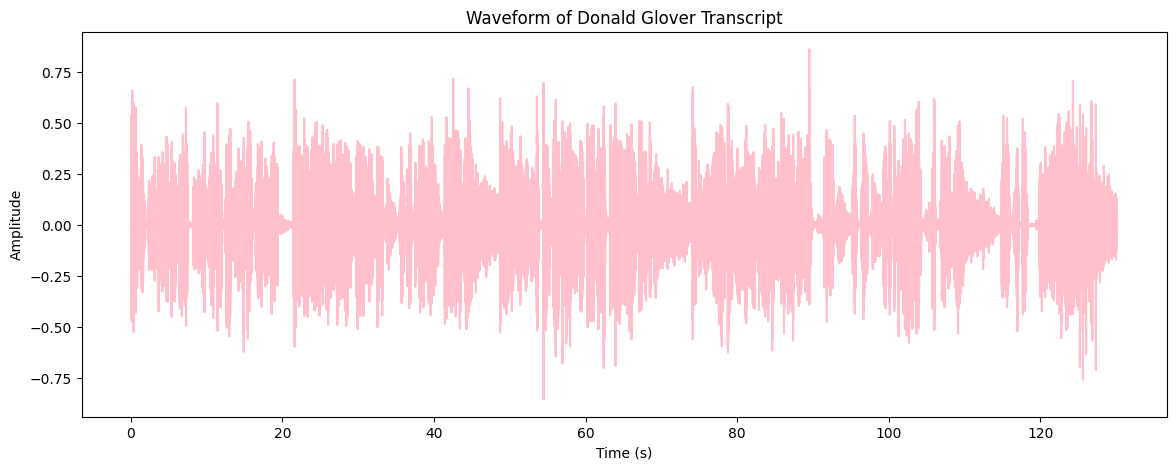

In [90]:
plot_mp3(dg_audio, "Donald Glover")

In [91]:
def plot_mp3_laugh_start(audio, name, laughter_intervals):
    data, sr = librosa.load(audio, sr=None)
    time = np.arange(len(data)) / sr
    plt.figure(figsize=(14, 5))
    plt.plot(time, data, color="pink")
    for start in laughter_intervals.keys():
        plt.axvline(x=start, color='blue', linestyle='--', linewidth=1)

    plt.title(f"Waveform of {name} Transcript")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

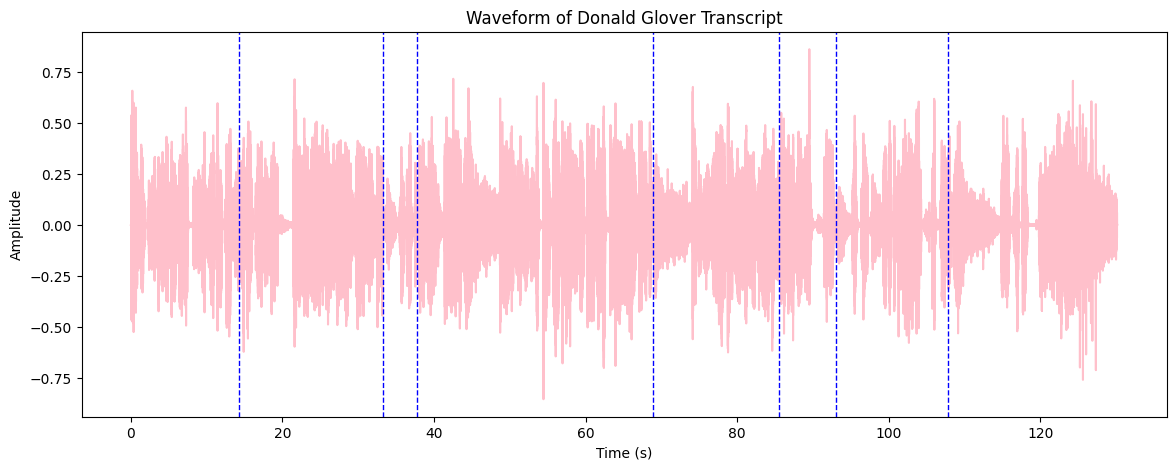

In [92]:
plot_mp3_laugh_start(dg_audio, "Donald Glover", dg_intervals)

In [93]:
def split_sentence(sentence, max_length=80):
    lines = []
    while len(sentence) > max_length:
        split_index = sentence.rfind(' ', 0, max_length)
        if split_index == -1:

            split_index = max_length
        lines.append(sentence[:split_index].strip())
        sentence = sentence[split_index:].strip()
    lines.append(sentence)
    return lines

def plot_mp3_laugh_sent(audio, name, laughter_intervals, sentences):
    data, sr = librosa.load(audio, sr=None)
    time = np.arange(len(data)) / sr
    plt.figure(figsize=(14, 5))
    plt.plot(time, data, color="pink")

    for start, sentence in laughter_intervals.items():
        if start != list(laughter_intervals.keys())[-1]:
            lines = split_sentence(sentence)
            label_text = '\n'.join(lines)
            plt.text(start, np.min(data) - 0.1 * (np.max(data) - np.min(data)), label_text, rotation=90, verticalalignment='top', horizontalalignment='center', fontsize=8)
        else:
            plt.text(start, np.min(data) - 0.1 * (np.max(data) - np.min(data)), sentence, rotation=90, verticalalignment='top', horizontalalignment='center', fontsize=8)

        plt.axvline(x=start, color='blue', linestyle='--', linewidth=1)

    plt.title(f"Waveform of {name} Transcript")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

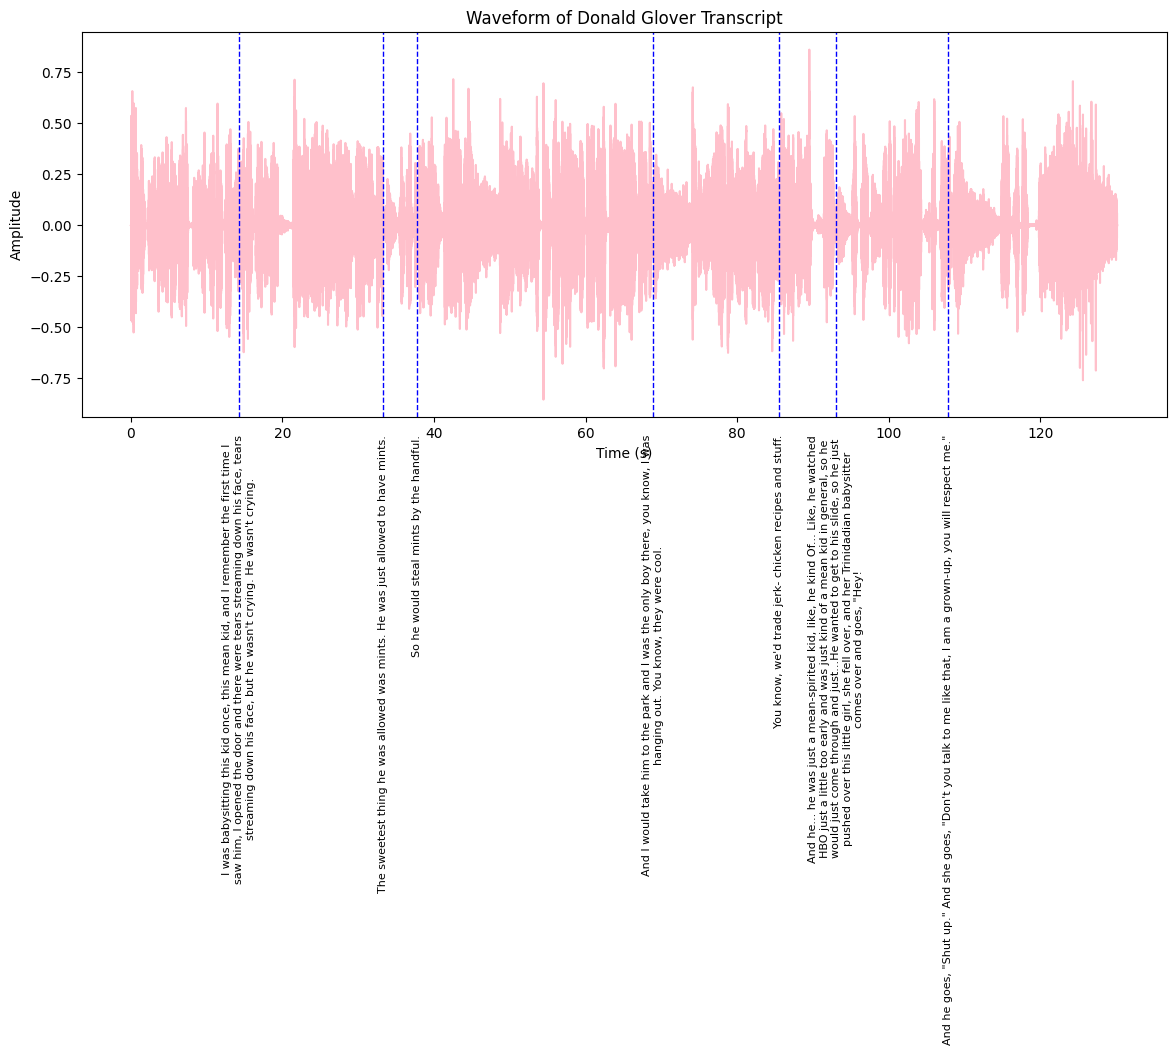

In [94]:
plot_mp3_laugh_sent(dg_audio, "Donald Glover", dg_laughter_map, sentences)

## Anthony Jeselnik

In [101]:
aj_laugh_times = [{'filename': 'aj_laughter/laugh_0.wav', 'start': 0.0, 'end': 1.1484084880636605},
                  {'filename': 'aj_laughter/laugh_1.wav', 'start': 9.796627510420615, 'end': 10.57004547176961},
                  {'filename': 'aj_laughter/laugh_2.wav', 'start': 16.898010610079577, 'end': 19.405759757483896},
                  {'filename': 'aj_laughter/laugh_3.wav', 'start': 23.78846153846154, 'end': 25.54622963243653},
                  {'filename': 'aj_laughter/laugh_4.wav', 'start': 29.08520272830618, 'end': 31.1007768093975},
                  {'filename': 'aj_laughter/laugh_5.wav', 'start': 34.87411898446381, 'end': 36.23345964380447},
                  {'filename': 'aj_laughter/laugh_6.wav', 'start': 43.756707086017435, 'end': 48.91282682834407},
                  {'filename': 'aj_laughter/laugh_7.wav', 'start': 86.5056271314892, 'end': 88.49776430466086},
                  {'filename': 'aj_laughter/laugh_8.wav', 'start': 93.98200075786283, 'end': 100.70839333080713},
                  {'filename': 'aj_laughter/laugh_9.wav', 'start': 114.65335354300872, 'end': 120.2782114437287}]

In [102]:
aj_textgrid_file_path = "/content/AJ_TP_audio_15_laughter.TextGrid"
aj_intervals = read_textgrid_file(aj_textgrid_file_path)

for start, end in aj_intervals.items():
    print("start:", start, "end:", end)

aj_laughter_map = create_laughter_map(aj_intervals, "/content/aj_output.json")

for laugh_start, matching_sentences in aj_laughter_map.items():
    print("Laughter Start Time:", laugh_start)
    print("Funny Sentences:", matching_sentences)
    print()

start: 9.796627510420615 end: 16.898010610079577
start: 16.898010610079577 end: 23.78846153846154
start: 23.78846153846154 end: 29.08520272830618
start: 29.08520272830618 end: 34.87411898446381
start: 34.87411898446381 end: 43.756707086017435
start: 43.756707086017435 end: 86.5056271314892
start: 86.5056271314892 end: 93.98200075786283
start: 93.98200075786283 end: 114.65335354300872
Laughter Start Time: 9.796627510420615
Funny Sentences: When I was a kid, I used to fantasize about getting older, growing up and having money, and buying my mom nice things for her birthday. When I was a kid, we were poor.

Laughter Start Time: 23.78846153846154
Funny Sentences: So poor I remember, just so I could go to my senior prom, just so I could go to my senior prom, I had to sell my U.S. passport on the street.

Laughter Start Time: 29.08520272830618
Funny Sentences: Sold my passport on the street for 300 bucks to get to go to my prom. Of course this was before 9/11 so... my bad, everybody.

Laught

In [103]:
aj_sentences = make_sent_list(aj_laughter_map)
print(aj_sentences)

['When I was a kid, I used to fantasize about getting older, growing up and having money, and buying my mom nice things for her birthday. When I was a kid, we were poor.', 'So poor I remember, just so I could go to my senior prom, just so I could go to my senior prom, I had to sell my U.S. passport on the street.', 'Sold my passport on the street for 300 bucks to get to go to my prom. Of course this was before 9/11 so... my bad, everybody.', 'Weird joke to clap for, but sure.', "My mom actually should've been on one of the planes that crashed on 9/11.", 'And when I did that, my mom would act weird. She\'d pull me aside and say, "Anthony, who\'s your new friend?', 'And I would say, "Shut up, Mom, that\'s racist. Put your money away.']


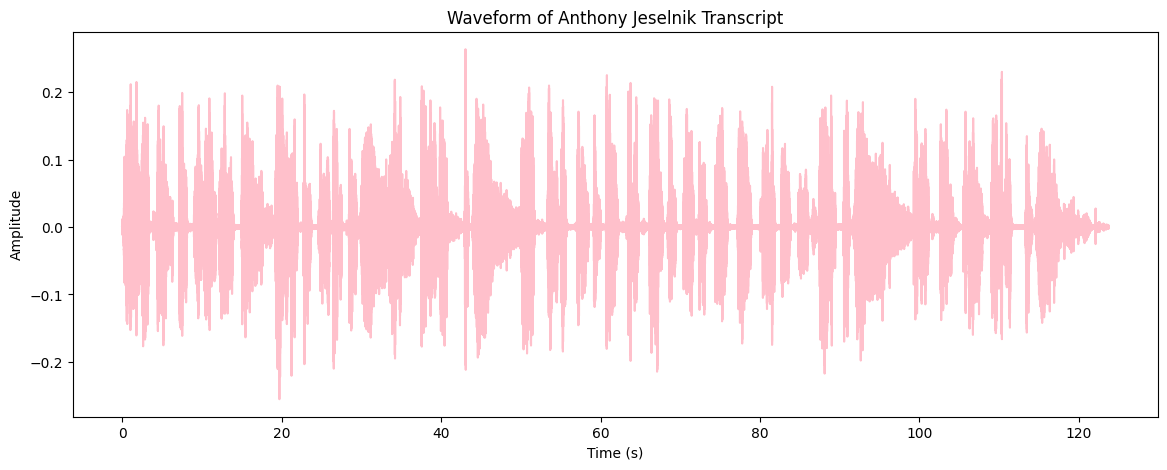

In [104]:
aj_audio = "/content/AJ_TP_audio_15.mp3"
plot_mp3(aj_audio, "Anthony Jeselnik")

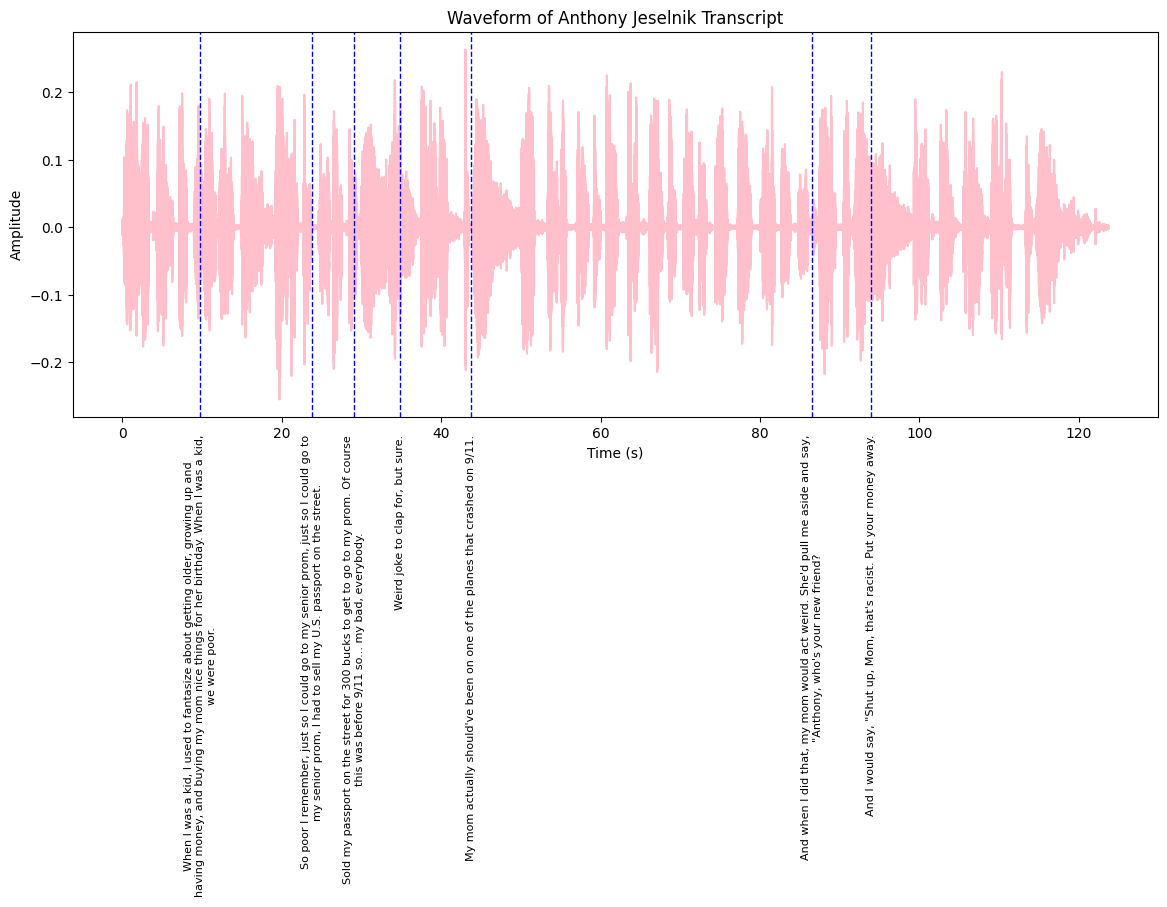

In [105]:
plot_mp3_laugh_sent(aj_audio, "Anthony Jeselnik", aj_laughter_map, aj_sentences)

Chelsea Peretti: One of the Greats

In [106]:
cp_laugh_times = [{'filename': 'cp_laughter/laugh_0.wav', 'start': 0.0, 'end': 1.1754617414248019},
                  {'filename': 'cp_laughter/laugh_1.wav', 'start': 7.875593667546173, 'end': 9.262638522427439},
                  {'filename': 'cp_laughter/laugh_2.wav', 'start': 13.212189973614773, 'end': 18.87791556728232},
                  {'filename': 'cp_laughter/laugh_3.wav', 'start': 24.966807387862794, 'end': 28.352137203166222},
                  {'filename': 'cp_laughter/laugh_4.wav', 'start': 29.574617414248017, 'end': 32.654327176780996},
                  {'filename': 'cp_laughter/laugh_5.wav', 'start': 39.63656992084432, 'end': 42.48118733509234},
                  {'filename': 'cp_laughter/laugh_6.wav', 'start': 59.00817941952506, 'end': 67.30693931398416},
                  {'filename': 'cp_laughter/laugh_7.wav', 'start': 69.09364116094986, 'end': 72.4554617414248},
                  {'filename': 'cp_laughter/laugh_8.wav', 'start': 74.38321899736147, 'end': 88.4887598944591}]

In [107]:
cp_textgrid_file_path = "/content/CP_OTG_audio_18_laughter.TextGrid"
cp_intervals = read_textgrid_file(cp_textgrid_file_path)

for start, end in cp_intervals.items():
    print("start:", start, "end:", end)

cp_laughter_map = create_laughter_map(cp_intervals, "/content/cp_output.json")

for laugh_start, matching_sentences in cp_laughter_map.items():
    print("Laughter Start Time:", laugh_start)
    print("Funny Sentences:", matching_sentences)
    print()

start: 7.875593667546173 end: 13.212189973614773
start: 13.212189973614773 end: 24.966807387862794
start: 24.966807387862794 end: 29.574617414248017
start: 29.574617414248017 end: 39.63656992084432
start: 39.63656992084432 end: 59.00817941952506
start: 59.00817941952506 end: 69.09364116094986
start: 69.09364116094986 end: 74.38321899736147
Laughter Start Time: 7.875593667546173
Funny Sentences: A friend of a friend just posted like 500 engagement photos on Facebook. It was a photoset of 500 photos.

Laughter Start Time: 13.212189973614773
Funny Sentences: I'm not exaggerating.

Laughter Start Time: 24.966807387862794
Funny Sentences: I'm just obsessed with the entire photoset. I'm just like, "Next, next, next, next, more, more, more, more."

Laughter Start Time: 39.63656992084432
Funny Sentences: Every photo, they were just like... [giggles shrilly] "Uh-oh, it's us again." [trills] This same girl on Facebook, all her posts and all her updates are about her husband.

Laughter Start Time

In [108]:
cp_sentences = make_sent_list(cp_laughter_map)
print(cp_sentences)

['A friend of a friend just posted like 500 engagement photos on Facebook. It was a photoset of 500 photos.', "I'm not exaggerating.", 'I\'m just obsessed with the entire photoset. I\'m just like, "Next, next, next, next, more, more, more, more."', 'Every photo, they were just like... [giggles shrilly] "Uh-oh, it\'s us again." [trills] This same girl on Facebook, all her posts and all her updates are about her husband.', 'She calls him by a word that I really feel is one of the more disgusting words in the English language. She calls him her "hubby," which, to me is on par with the "N" word.', 'My hubby fixed the door. My hubby is sleeping.']


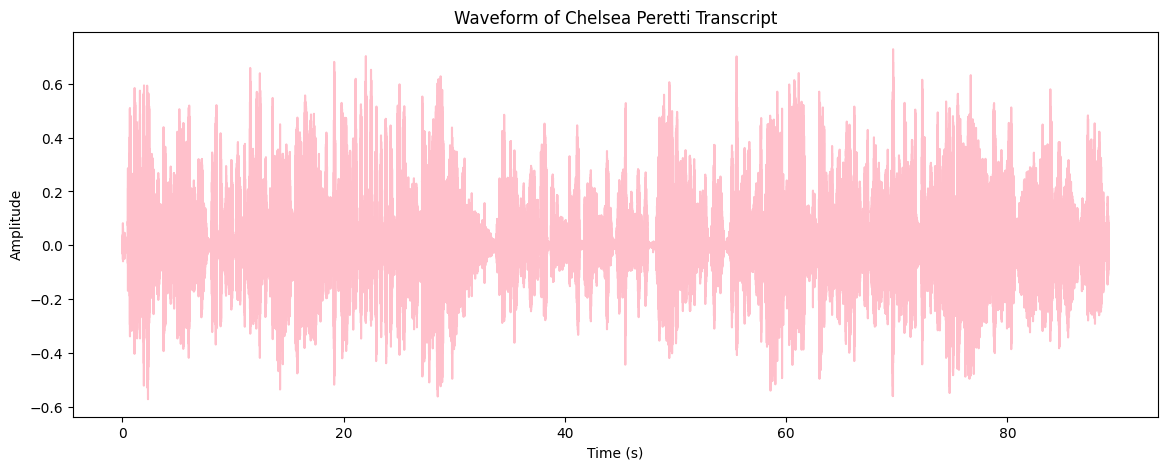

In [109]:
cp_audio = "/content/CP_OTG_audio_18.mp3"
plot_mp3(cp_audio, "Chelsea Peretti")

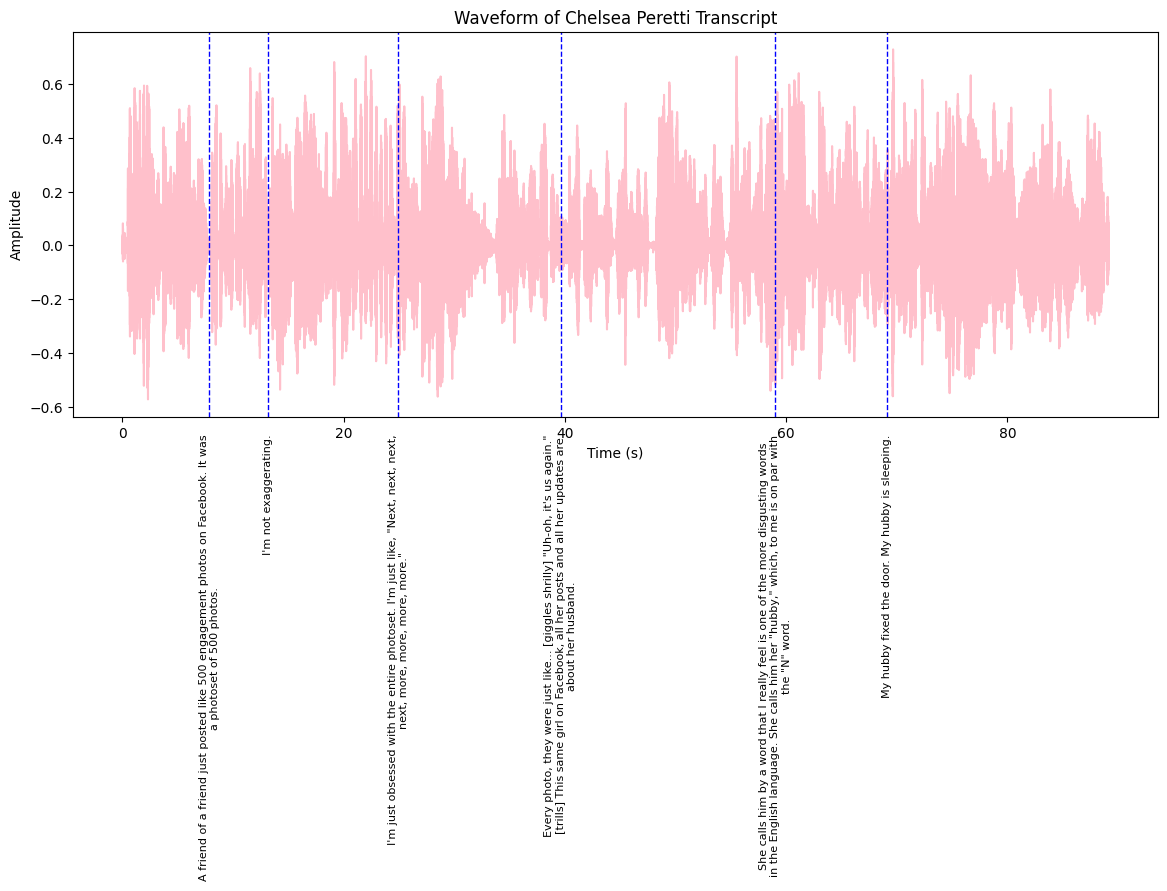

In [110]:
plot_mp3_laugh_sent(cp_audio, "Chelsea Peretti", cp_laughter_map, cp_sentences)

Louis C.K

In [111]:
lck_laugh_times = [{'filename': 'lck_laughter/laugh_0.wav', 'start': 0.0, 'end': 0.5893960192175703},
                   {'filename': 'lck_laughter/laugh_1.wav', 'start': 3.206314344543583, 'end': 4.668016472203157},
                   {'filename': 'lck_laughter/laugh_2.wav', 'start': 17.375394646533973, 'end': 20.77031571722718},
                   {'filename': 'lck_laughter/laugh_3.wav', 'start': 31.709505833905286, 'end': 41.44632807137955},
                   {'filename': 'lck_laughter/laugh_4.wav', 'start': 45.124159231297185, 'end': 48.943445435827044},
                   {'filename': 'lck_laughter/laugh_5.wav', 'start': 49.34423472889499, 'end': 55.403225806451616},
                   {'filename': 'lck_laughter/laugh_6.wav', 'start': 57.94941660947152, 'end': 64.03198352779684},
                   {'filename': 'lck_laughter/laugh_7.wav', 'start': 65.54083733699383, 'end': 67.37975291695264}]

In [112]:
lck_textgrid_file_path = "/content/LCK_SY_audio_06_laughter.TextGrid"
lck_intervals = read_textgrid_file(lck_textgrid_file_path)

for start, end in lck_intervals.items():
    print("start:", start, "end:", end)

lck_laughter_map = create_laughter_map(lck_intervals, "/content/lck_output.json")

for laugh_start, matching_sentences in lck_laughter_map.items():
    print("Laughter Start Time:", laugh_start)
    print("Funny Sentences:", matching_sentences)
    print()

start: 3.206314344543583 end: 17.375394646533973
start: 17.375394646533973 end: 31.709505833905286
start: 31.709505833905286 end: 45.124159231297185
start: 45.124159231297185 end: 49.34423472889499
start: 49.34423472889499 end: 57.94941660947152
start: 57.94941660947152 end: 65.54083733699383
Laughter Start Time: 17.375394646533973
Funny Sentences: Jesus was Jewish. And he said, "I don't think so."

Laughter Start Time: 31.709505833905286
Funny Sentences: He was like, "Dude, Jesus couldn't be Jewish. Think about it."

Laughter Start Time: 45.124159231297185
Funny Sentences: What was he? Catholic?

Laughter Start Time: 49.34423472889499
Funny Sentences: Okay, Jesus was Catholic and he had a gold chain with a cross.

Laughter Start Time: 57.94941660947152
Funny Sentences: "That finally makes sense. I didn't even know.



In [113]:
lck_sentences = make_sent_list(lck_laughter_map)
print(lck_sentences)

['Jesus was Jewish. And he said, "I don\'t think so."', 'He was like, "Dude, Jesus couldn\'t be Jewish. Think about it."', 'What was he? Catholic?', 'Okay, Jesus was Catholic and he had a gold chain with a cross.', '"That finally makes sense. I didn\'t even know.']


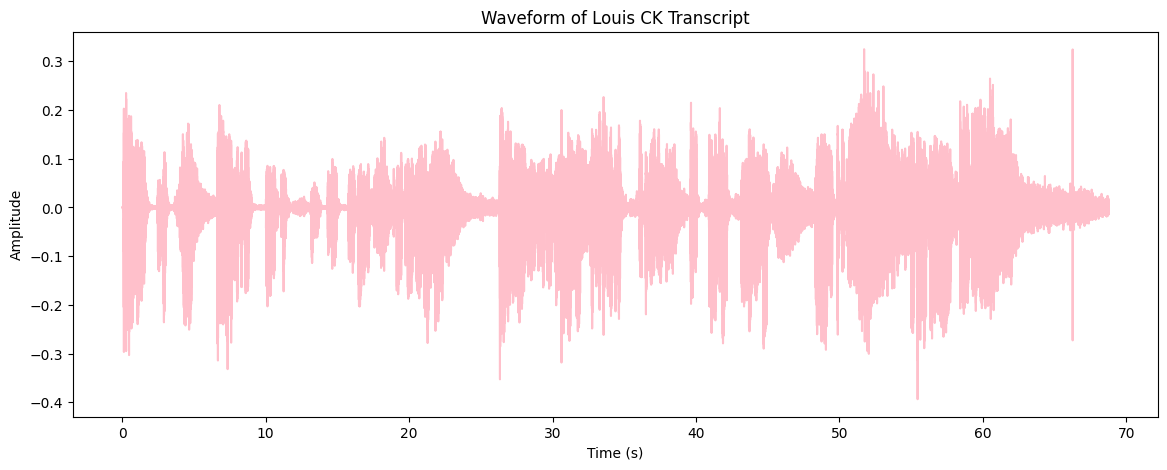

In [114]:
lck_audio = "/content/LCK_SY_audio_06.mp3"
plot_mp3(lck_audio, "Louis CK")

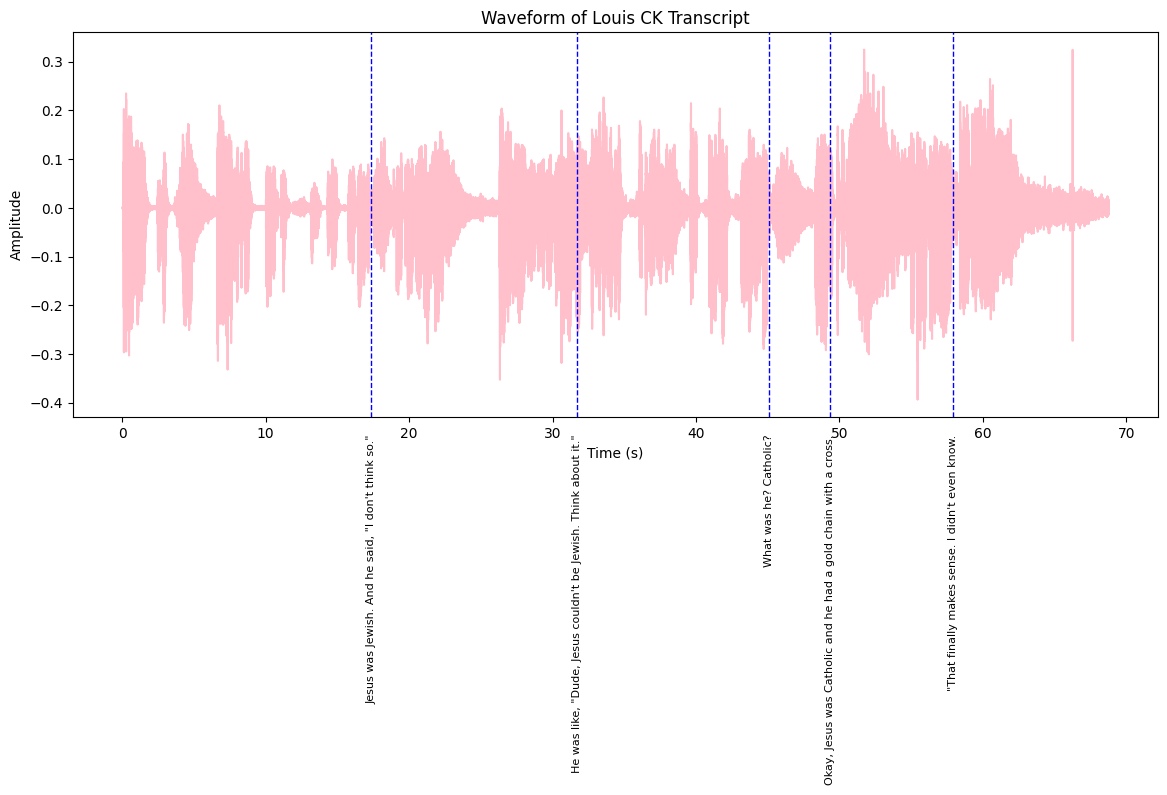

In [115]:
plot_mp3_laugh_sent(lck_audio, "Louis CK", lck_laughter_map, lck_sentences)

John Mulaney

In [116]:
jm_laugh_times = [{'filename': 'jm_laughter/laugh_0.wav', 'start': 1.9682337516388835, 'end': 5.389211462820752},
                  {'filename': 'jm_laughter/laugh_1.wav', 'start': 14.457145532871323, 'end': 15.933320846600486},
                  {'filename': 'jm_laughter/laugh_2.wav', 'start': 23.946843978273083, 'end': 26.87576325154523},
                  {'filename': 'jm_laughter/laugh_3.wav', 'start': 32.54615096460011, 'end': 40.02075294999063},
                  {'filename': 'jm_laughter/laugh_4.wav', 'start': 41.33290878441655, 'end': 55.48544671286757},
                  {'filename': 'jm_laughter/laugh_5.wav', 'start': 59.49220827870387, 'end': 65.86553661734406},
                  {'filename': 'jm_laughter/laugh_6.wav', 'start': 67.85720172316913, 'end': 70.7626896422551},
                  {'filename': 'jm_laughter/laugh_7.wav', 'start': 73.527589436224, 'end': 74.20709870762315},
                  {'filename': 'jm_laughter/laugh_8.wav', 'start': 76.76111631391646, 'end': 77.55778235624648},
                  {'filename': 'jm_laughter/laugh_9.wav', 'start': 83.9076793407005, 'end': 85.89934444652556},
                  {'filename': 'jm_laughter/laugh_10.wav', 'start': 87.77385278141973, 'end': 89.20316538677653},
                  {'filename': 'jm_laughter/laugh_11.wav', 'start': 97.75560966473121, 'end': 105.9800149840794},
                  {'filename': 'jm_laughter/laugh_12.wav', 'start': 108.97922831991008, 'end': 112.16589248923017},
                  {'filename': 'jm_laughter/laugh_13.wav', 'start': 113.78265592807641, 'end': 125.07656864581381}]

In [117]:
jm_textgrid_file_path = "/content/JM_KDRC_audio_12_laughter.TextGrid"
jm_intervals = read_textgrid_file(jm_textgrid_file_path)

for start, end in jm_intervals.items():
    print("start:", start, "end:", end)

jm_laughter_map = create_laughter_map(jm_intervals, "/content/jm_output.json")

for laugh_start, matching_sentences in jm_laughter_map.items():
    print("Laughter Start Time:", laugh_start)
    print("Funny Sentences:", matching_sentences)
    print()

start: 1.9682337516388835 end: 14.457145532871323
start: 14.457145532871323 end: 23.946843978273083
start: 23.946843978273083 end: 32.54615096460011
start: 32.54615096460011 end: 41.33290878441655
start: 41.33290878441655 end: 59.49220827870387
start: 59.49220827870387 end: 67.85720172316913
start: 67.85720172316913 end: 73.527589436224
start: 73.527589436224 end: 76.76111631391646
start: 76.76111631391646 end: 83.9076793407005
start: 83.9076793407005 end: 87.77385278141973
start: 87.77385278141973 end: 97.75560966473121
start: 97.75560966473121 end: 108.97922831991008
start: 108.97922831991008 end: 113.78265592807641
Laughter Start Time: 14.457145532871323
Funny Sentences: My wife and I just gave a bunch of stuff to Goodwill. We were moving apartments, we had a bunch of clothes and furniture, so we made a whole day out of it.

Laughter Start Time: 23.946843978273083
Funny Sentences: We made these big piles of clothes, we put the piles into these big boxes, then we put the boxes into t

In [118]:
jm_sentences = make_sent_list(jm_laughter_map)
print(jm_sentences)

['My wife and I just gave a bunch of stuff to Goodwill. We were moving apartments, we had a bunch of clothes and furniture, so we made a whole day out of it.', 'We made these big piles of clothes, we put the piles into these big boxes, then we put the boxes into the back of my car, and then they stayed there for four months.', 'And I said, "Of course I did! On an unrelated note, I\'m going to walk out the front door right now."', "It was charitable, but it was also fast and violent, because I was throwing boxes at people. The boxes were so heavy I couldn't even say what was in them.", 'He\'s like, "Take this receipt for the clothing for your taxes." How do I write that on my taxes?', 'My mom said it could be a sleep shirt. Please deduct this from my 2017 income."', 'That sleep shirt bullshit.', '"Well, if it\'s too big you can just wear it as a sleep shirt."', "No, I get that, Mom, but why don't we just tell our relatives that I'm a four-year-old boy and I don't wear a man's XXL T-shir

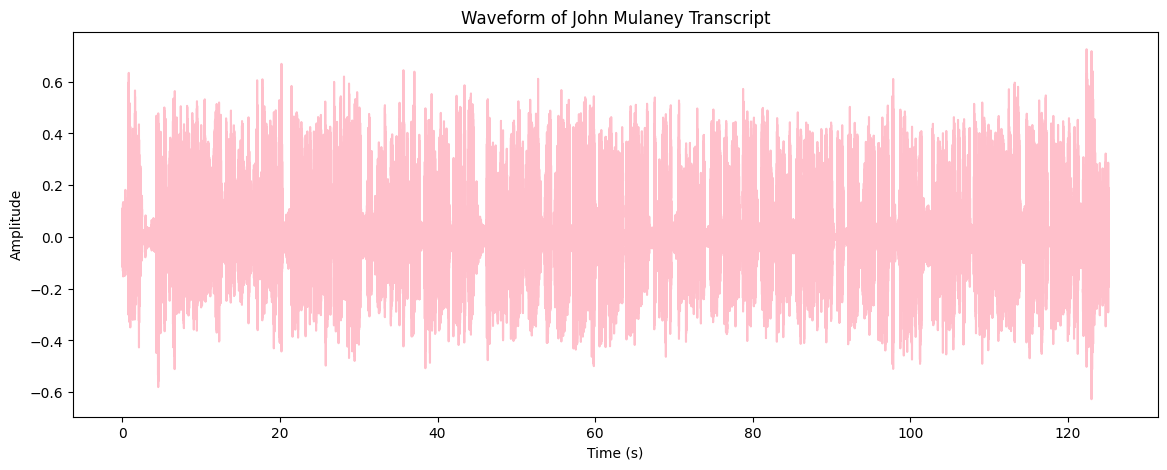

In [119]:
jm_audio = "/content/JM_KDRC_audio_12.mp3"
plot_mp3(jm_audio, "John Mulaney")

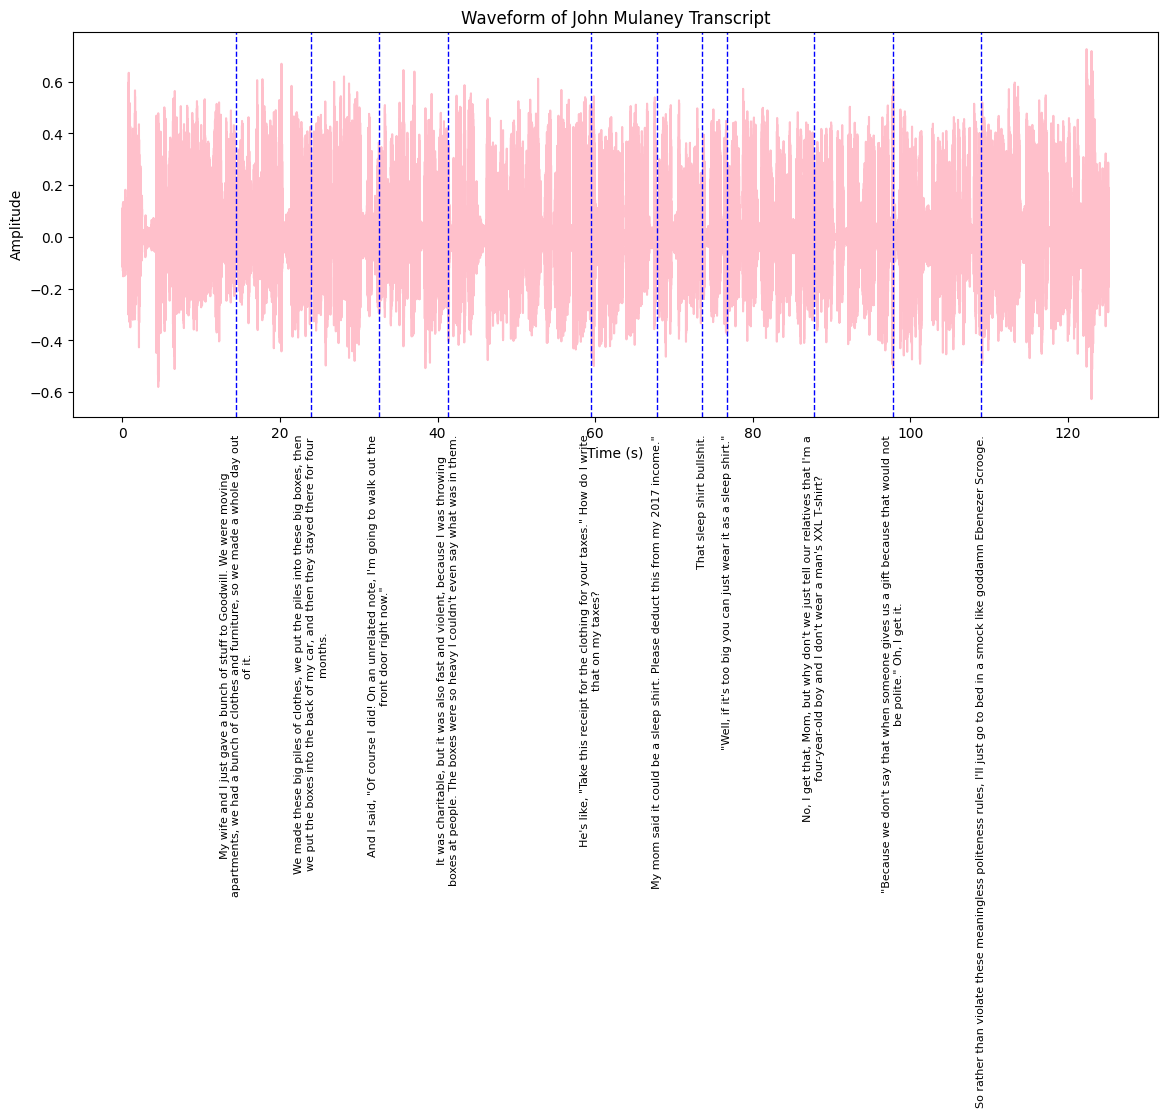

In [120]:
plot_mp3_laugh_sent(jm_audio, "John Mulaney", jm_laughter_map, jm_sentences)